In [8]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier

In [62]:
# import CSV
df = pd.read_csv('../../Data/data_0719_14_10.csv').drop('first_review', axis=1).drop('id', axis=1)
df1 = df.dropna(how='any')
fea_labels = df.columns[1:]

In [63]:
X_train = df1.drop('price', axis=1)[:100]
y_train = df1['price'][:100]

In [64]:
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [65]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

In [66]:
importances

array([0.0456354 , 0.01189578, 0.00944359, 0.02700033, 0.02685296,
       0.        , 0.01199551, 0.01953763, 0.0604939 , 0.05623859,
       0.0119064 , 0.01382749, 0.0326989 , 0.01645701, 0.0150622 ,
       0.01832597, 0.        , 0.01929044, 0.03350642, 0.01890314,
       0.03423402, 0.03624818, 0.0403843 , 0.03672671, 0.0428882 ,
       0.03640095, 0.04062304, 0.02172326, 0.01961738, 0.01283846,
       0.01155081, 0.02252   , 0.0189544 , 0.01219506, 0.        ,
       0.01948785, 0.00656696, 0.00734194, 0.02599768, 0.03214125,
       0.02596303, 0.00229304, 0.04423182])

In [67]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30, fea_labels[f], importances[indices[f]]))

 1) host_response_rate             0.060494
 2) host_is_superhost              0.056239
 3) host_listings_count            0.045635
 4) host_total_listings_count      0.044232
 5) host_has_profile_pic           0.042888
 6) host_identity_verified         0.040623
 7) neighbourhood_cleansed         0.040384
 8) latitude                       0.036727
 9) longitude                      0.036401
10) is_location_exact              0.036248
11) room_type                      0.034234
12) accommodates                   0.033506
13) bathrooms                      0.032699
14) bedrooms                       0.032141
15) beds                           0.027000
16) bed_type                       0.026853
17) price                          0.025998
18) guests_included                0.025963
19) extra_people                   0.022520
20) minimum_nights                 0.021723
21) availability_30                0.019617
22) availability_60                0.019538
23) availability_90             

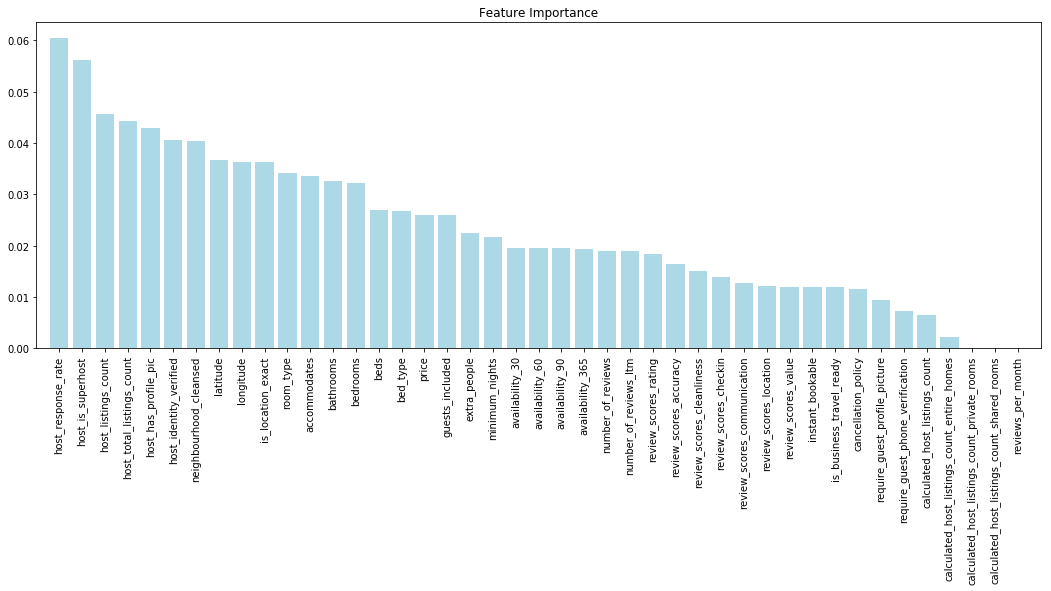

<Figure size 432x288 with 0 Axes>

In [75]:
plt.figure(figsize=(18, 6))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], color='lightblue', align='center')
plt.xticks(range(X_train.shape[1]), fea_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()
plt.savefig('data.png')